# Astropy ECSV Files processing Tutorial

This example processes one ECSV monthly file from stas289 TESS-W photometer and plots some graphics using `Astropy` and `Matplotlib`.
Basic `AstroPy` tables usage is shown.



## Pre-requistes

### Create a python virtual enviroment and install TESS-IDA-TOOLS alongside jupyter:
  
```bash
~$ mkdir jupyter
cd jupyter 
jupyter$ python3 -m venv .venv
jupyter$ source .venv/bin/activate
(.venv)  jupyter$ 
(.venv)  jupyter$ pip install -U pip
(.venv)  jupyter$ pip install notebook matplotlib
(.venv)  pip install git+https://github.com/STARS4ALL/TESS-IDA-TOOLS#main
```

### Configure TESS-IDA-TOOLS

With the help of a text editor, create a new auxiliar environment file called `.env`
Inside this file, you must add two environment variables:

```text
IDA_URL=<NextCloud Server IDA base URL>
DATABASE_FILE=adm/tessida.db
```

The first one contains the base URL of our NextCloud Server where we publish the IDA files (and you should already have)
The second one is the path of an auxiliar SQLite database file that help us in the process of download and convert IDA files to ECSV

The example above shows that we will create an `adm` subdirectory inside our working directory `~/jupyter` and a database file named `tessida.db`.

As the final step, we must initialize the database:

```bash
tess-ida-db --console schema create
```

### Use TESS-IDA-TOOLS

Download a single IDA monthly file `stars289_2022-03.dat` and convert into an ECSV file using our pipleline tool

```bash
tess-ida-pipe --console single --in-dir IDA --out-dir ECSV --name stars289 --month 2022-03
```

# Processing the file
But first, we need to import several packages and objects.

In [78]:
import os

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.timeseries import TimeSeries

# These come ftrom our TESS-IDA-TOOLS package
from tess.ida.constants import StringEnum, TESSW_COLS as TW, TIMESERIES_COLS as TS, IDA_KEYWORDS as IKW

FILE_TO_PROCESS = os.path.join('ECSV', 'stars289', 'stars289_2022-03.ecsv')

In [79]:
print(FILE_TO_PROCESS)

ECSV/stars289/stars289_2022-03.ecsv


We load this file as a TimeSeries AstroPy Table. TimeSeries tables have a special first column named `time` and also have additional methods for processing. See the [AstroPy documentation](https://docs.astropy.org/en/stable/timeseries/index.html) for more details.

Note that the format is always `'ascii.ecsv'` and the delimiter is always a comma.

In [80]:
table = TimeSeries.read(FILE_TO_PROCESS, format='ascii.ecsv', delimiter=',')

The table general structure is shown by typing:

In [81]:
table.info

<TimeSeries length=23807>
         name          dtype       unit      class  
--------------------- ------- ------------- --------
                 time  object                   Time
Enclosure Temperature float64         deg_C Quantity
      Sky Temperature float64         deg_C Quantity
            Frequency float64            Hz Quantity
                 MSAS float64 mag / arcsec2 Quantity
                   ZP float64                 Column
      Sequence Number   int64                 Column
              Sun Alt float64           deg Quantity
             Moon Alt float64           deg Quantity
    Moon Illumination float64                 Column

A selection of the first 5 rows in the table is shown by typing: 

In [82]:
table[0:5]

time,Enclosure Temperature,Sky Temperature,Frequency,MSAS,ZP,Sequence Number,Sun Alt,Moon Alt,Moon Illumination
,deg_C,deg_C,Hz,mag / arcsec2,,,deg,deg,
Time,float64,float64,float64,float64,float64,int64,float64,float64,float64
2022-03-01T00:00:14.000,0.0,0.0,0.34,21.63,20.45,96365,-59.13,-68.0,0.041
2022-03-01T00:01:14.000,0.0,0.0,0.34,21.64,20.45,96366,-59.16,-68.0,0.041
2022-03-01T00:02:14.000,0.0,0.0,0.34,21.64,20.45,96367,-59.2,-68.0,0.041
2022-03-01T00:03:14.000,0.0,0.0,0.34,21.64,20.45,96368,-59.23,-68.0,0.041
2022-03-01T00:04:14.000,0.0,0.0,0.34,21.64,20.45,96369,-59.26,-68.0,0.041


## TimeSeries Table columns

The first column is always the `time` column and this is imposed by `AstroPy`.

In the table info displayed above, you can see the actual column names. Note that many of these columns have units attached to them. These columns are denominated Quantities in Astropy and you can see them in the taable structure. Many of them have long names and are difficult to remember and cumbersome to type. The TESS-IDA-TOOLS package has defined these string literals as constants. Notice the `from tess.ida.constants import TESSW_COLS as TW, TIMESERIES_COLS as TS, IDA_KEYWORDS as IKW` import above.

Even if the string literals could change, your code will not. For instance, in your code, to access the frequencies data, you will refer to the `table['Frequency']` column as `table[TW.FREQ]`

You can see below the constants defined for the TESS-W columns. (There is another set for the TESS4C columns)
 
```python
class TESSW_COLS(StringEnum):
    UTC_TIME   = 'time' # always 'time' for TimeSeries Astropy Class
    LOCAL_TIME = 'Local Date & Time'
    BOX_TEMP   = 'Enclosure Temperature'
    SKY_TEMP   = 'Sky Temperature'
    FREQ       = 'Frequency'
    MAG        = 'MSAS'
    ZP         = 'ZP'
    SEQ_NUM    = 'Sequence Number'

class TESS4C_COLS(StringEnum):
    UTC_TIME   = 'time' # always 'time' for TimeSeries Astropy Class
    LOCAL_TIME = 'Local Date & Time'
    BOX_TEMP   = 'Enclosure Temperature'
    SKY_TEMP   = 'Sky Temperature'
    FREQ1      = 'Freq1'
    MAG1       = 'MSAS1'
    ZP1        = 'ZP1'
    FREQ2      = 'Freq2'
    MAG2       = 'MSAS2'
    ZP2        = 'ZP2'
    FREQ3      = 'Freq3'
    MAG3       = 'MSAS3'
    ZP3        = 'ZP3'
    FREQ4      = 'Freq4'
    MAG4       = 'MSAS4'
    ZP4        = 'ZP4'
    SEQ_NUM    = 'Sequence Number'
```

Additional columns may be aded in the IDA to ECSV conversion.
These are the column names

```python
class TIMESERIES_COLS(StringEnum):
    SUN_ALT    = 'Sun Alt'
    SUN_AZ     = 'Sun Az'
    MOON_AZ    = 'Moon Alt'
    MOON_ALT   = 'Moon Alt'
    MOON_ILLUM = 'Moon Illumination'
```

But you do not have to remeber all this names. The constants are self descriptive

In [83]:
TW.names()

['UTC_TIME',
 'LOCAL_TIME',
 'BOX_TEMP',
 'SKY_TEMP',
 'FREQ',
 'MAG',
 'ZP',
 'SEQ_NUM']

In [84]:
TW.values()

['time',
 'Local Date & Time',
 'Enclosure Temperature',
 'Sky Temperature',
 'Frequency',
 'MSAS',
 'ZP',
 'Sequence Number']

### Column access Examples

In [85]:
table[TW.FREQ][0]

<Quantity 0.34 Hz>

In [86]:
table[TS.SUN_ALT][0]

<Quantity -59.13 deg>

## IDA Header metadata and their symbolic names

Metadata imported from the IDA files are available in the `meta` attribute of the table. There is also a symbolic set of constanst avaliable for its access:
```python
class IDA_KEYWORDS(StringEnum):
    LICENSE      = 'License'
    NUM_HEADERS  = 'Number of header lines'
    NUM_CHANNELS = 'Number of channels'
    OBSERVER     = 'Data supplier'
    LOCATION     = 'Location name'
    TIMEZONE     = 'Local timezone'
    POSITION     = 'Position'
    FOV          = 'Field of view'
    COVER_OFFSET = 'TESS cover offset value'
    NUM_COLS     = 'Number of fields per line'
    ZP           = 'TESS zero point'
    AIM          = 'Measurement direction per channel'
    FILTERS      = 'Filters per channel'
    PHOT_NAME    = 'Instrument ID'
```

In [87]:
table.meta['ida']

{'Data supplier': {'affiliation': 'Astrocamp', 'observer': 'Agustín Nuñez'},
 'Device type': 'TESS-W',
 'Field of view': 17.0,
 'Filters per channel': 'None',
 'Instrument ID': 'stars289',
 'License': 'ODbL 1.0 http://opendatacommons.org/licenses/odbl/summary/',
 'Local timezone': 'Europe/Madrid',
 'Location name': {'country': '- Astrocamp',
  'place': 'Nerpio',
  'region': 'Spain',
  'sub_region': 'Castile-La Mancha',
  'town': 'Albacete'},
 'Measurement direction per channel': {'azimuth': 0.0, 'zenital': 0.0},
 'Moving / Fixed look direction': 'FIXED',
 'Moving / Stationary position': 'STATIONARY',
 'Number of channels': 1,
 'Number of fields per line': 8,
 'Number of header lines': 35,
 'Position': {'height': 0.0, 'latitude': 38.1657813, 'longitude': -2.3268926},
 'TESS MAC address': '5C:CF:7F:76:60:EC',
 'TESS cover offset value': 0.0,
 'TESS firmware version': '1.0',
 'TESS zero point': 20.45,
 'Time Synchronization': 'timestamp added by MQTT subscriber',
 'URL': 'http://www.darks

### Examples accesing IDA metadata

To access the position, just type:

In [88]:
table.meta['ida'][IKW.POSITION]

{'height': 0.0, 'latitude': 38.1657813, 'longitude': -2.3268926}

In [89]:
table.meta['ida'][IKW.POSITION]['latitude']

38.1657813

Note that metadata has not associated AstroPy units, they are not Quantities. However, we can generate them on the fly in our code by using the units subpackage on the fly in our code:

In [90]:
import astropy.units as u

table.meta['ida'][IKW.POSITION]['latitude'] * u.deg

<Quantity 38.1657813 deg>

## Adding columns to the table

Astropy tables are dynamic: We can also add new columns on the fly. The processing is done for all rows in a column. For instance, to add a Julian Day column to our TimeSeries, we can take advantage on the `jd` property of the `time` column (whose type is `Time`):

In [91]:
table['Julian Day'] = table[TW.UTC_TIME].jd
table.info

<TimeSeries length=23807>
         name          dtype       unit      class  
--------------------- ------- ------------- --------
                 time  object                   Time
Enclosure Temperature float64         deg_C Quantity
      Sky Temperature float64         deg_C Quantity
            Frequency float64            Hz Quantity
                 MSAS float64 mag / arcsec2 Quantity
                   ZP float64                 Column
      Sequence Number   int64                 Column
              Sun Alt float64           deg Quantity
             Moon Alt float64           deg Quantity
    Moon Illumination float64                 Column
           Julian Day float64                 Column

You can use the column literals in your code as in the 'Julian Day' example above or use your own set of symbolic constants under your chosen namespace (`MYC` in the example below):

In [92]:
class MYC(StringEnum):
    JDAY = 'Julian Day'
    FOO = 'Foo column'
    BAR = 'Bar Column'

## Saving the Time Series table to an ECSV file

To permanently save the processed table with the Julian Date, all you need is:

In [93]:
table.write('example.ecsv', format='ascii.ecsv', delimiter=',', fast_writer=True, overwrite=True)


## Plotting

To plot Astropy Quantities in matplotlib we need support from AstroPy.


In [94]:
# These two lines are needed to plot Astropy Quantities in matplotlib
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f324ac6d510>

We will create another table with only night data based on the Sun altitude. This means:
1. creating a mask first and
2. apply the mask to the table.
  
Since the Sun Altitude column has units (u.deg), we must specity the condition with units too.

In [95]:
# Astronomical night :   Sun below -18 deg 
# Civil night :   Sun below -6 deg 
# Nautical night :   Sun below -12 deg 
mask_night = table[TS.SUN_ALT] < -14.0 * u.deg
night_table = table[mask_night]
night_table.info

<TimeSeries length=17235>
         name          dtype       unit      class  
--------------------- ------- ------------- --------
                 time  object                   Time
Enclosure Temperature float64         deg_C Quantity
      Sky Temperature float64         deg_C Quantity
            Frequency float64            Hz Quantity
                 MSAS float64 mag / arcsec2 Quantity
                   ZP float64                 Column
      Sequence Number   int64                 Column
              Sun Alt float64           deg Quantity
             Moon Alt float64           deg Quantity
    Moon Illumination float64                 Column
           Julian Day float64                 Column

We will plot an histogram comparing all the accumulated data from all days and only the night data

Text(0.5, 1.0, 'stars289 Nerpio 2023/05')

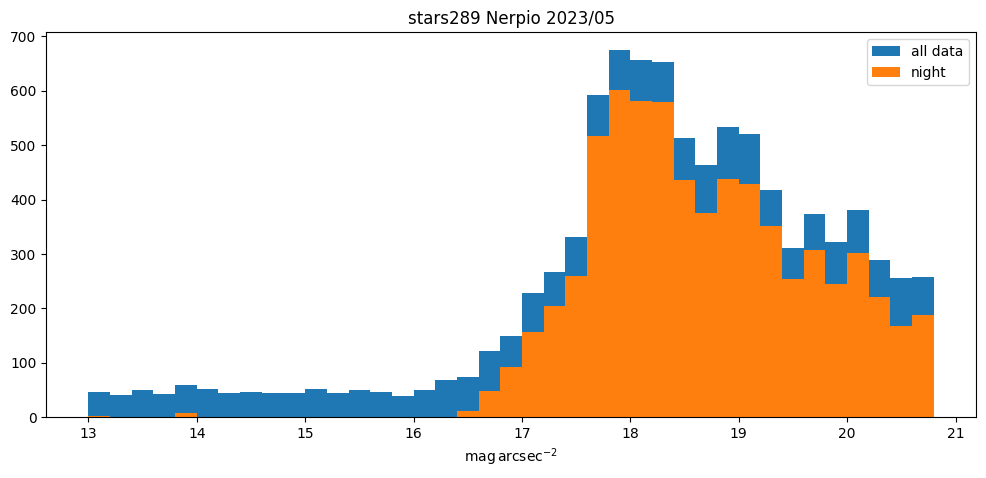

In [96]:
figure = plt.figure(figsize=(12, 5))
ax1=figure.add_subplot(111)
bins = np.arange(13,21,0.2)

plt.hist(table[TW.MAG],bins=bins,alpha=1,label='all data')
plt.hist(night_table[TW.MAG],bins=bins,alpha=1,label='night')
plt.legend()
plt.title('stars289 Nerpio 2023/05')

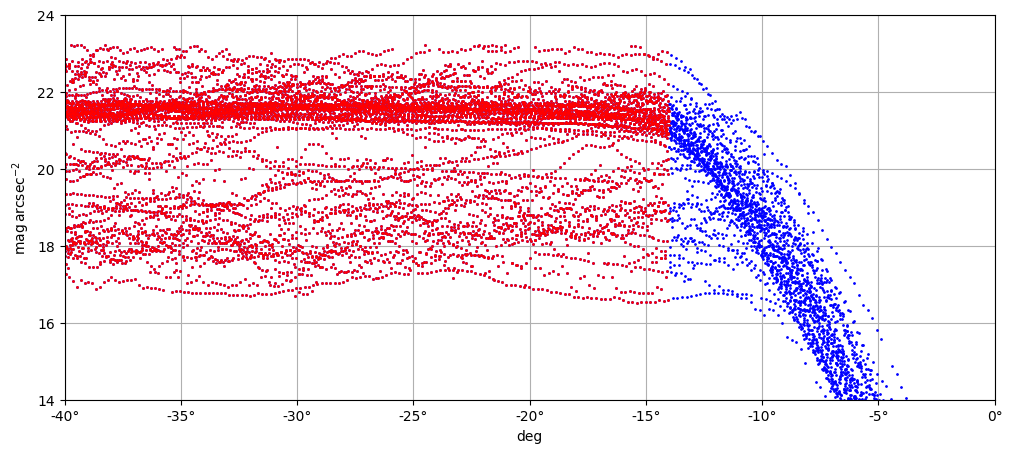

In [97]:
figure = plt.figure(figsize=(12, 5))
ax1=figure.add_subplot(111)
plt.plot(table[TS.SUN_ALT],table[TW.MAG],'bo',ms=1)
plt.plot(night_table[TS.SUN_ALT],night_table[TW.MAG],'ro',ms=1)
plt.ylim(14,24)
#plt.axhline(22)
plt.xlim(-40,0)
plt.grid()

#### Moon effects on TESS-W readings

Lets see the data on moonless intervals by applying a moonless mask

In [98]:
# moonless nights: Moon below 0 deg 
moon_mask = night_table[TS.MOON_ALT] < 0.0 * u.deg
moonless_night_table = night_table[moon_mask]

Text(0, 0.5, 'TESS-W NSB')

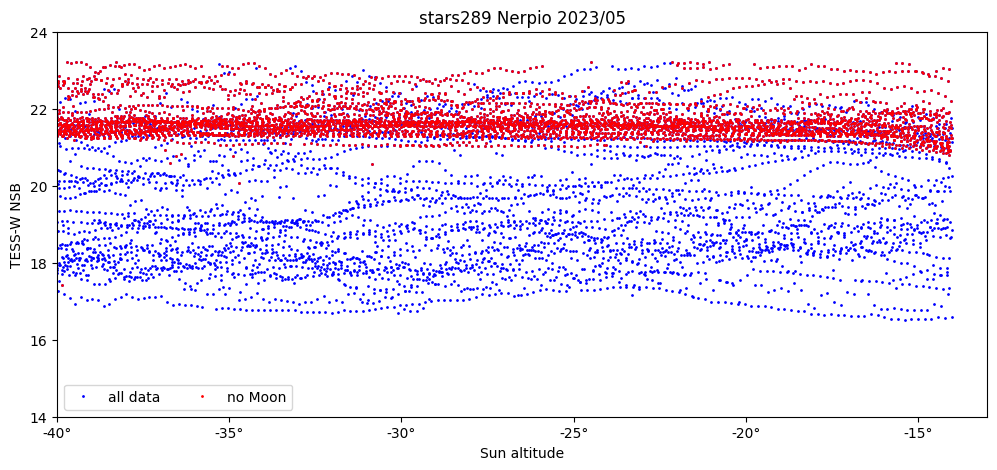

In [99]:
figure = plt.figure(figsize=(12, 5))
ax1=figure.add_subplot(111)
plt.plot(night_table[TS.SUN_ALT],night_table[TW.MAG],'bo',ms=1,label='all data')
plt.plot(moonless_night_table[TS.SUN_ALT],moonless_night_table[TW.MAG],'ro',ms=1,label='no Moon')
plt.ylim(14,24)
plt.xlim(-40,-13)
plt.legend(ncol=2)
plt.title('stars289 Nerpio 2023/05')
plt.xlabel('Sun altitude')
plt.ylabel('TESS-W NSB')

Text(0.01, 0.9, 'stars289 2023/05 data')

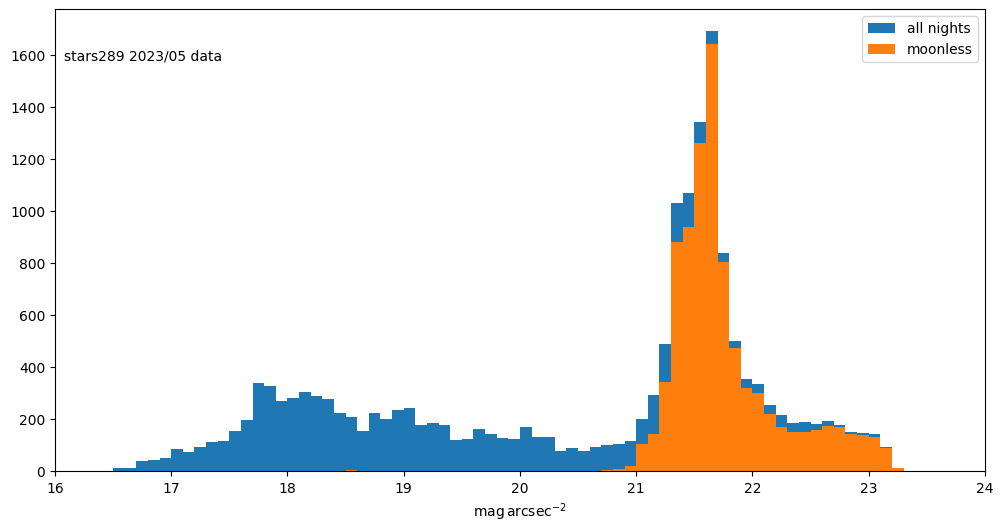

In [100]:
figure = plt.figure(figsize=(12, 6))
ax=figure.add_subplot(111)
bins = np.arange(16,24,0.1)
plt.hist(night_table[TW.MAG],bins=bins,label='all nights')
plt.hist(moonless_night_table[TW.MAG],bins=bins,label='moonless')
plt.xlim(16,24)
plt.legend()
plt.text(0.01,0.9,'stars289 2023/05 data',ha='left',va='center', transform=ax.transAxes)